## Dataset description
* Uses the dataset returned generated in property_point_view_raw.ipynb, which is a subset of the property data from [Miami-Dade County Open Data Hub](https://gis-mdc.opendata.arcgis.com/datasets/property-point-view?orderBy=BUILDING_HEATED_AREA)

## Outline
* This notebook allows to easily analyze data of properties sold on a specific year.
* Filters data to focus on properties sold in 2019 at prices between 100,000 and 600,000. 
* Visualizes the distributions of numerical attributes.
* Spacial visualization of worst v.s best selling zip codes.
* Spacial visualization of a subset of filtered dataset.

In [8]:
import pandas as pd
import numpy as np

from datetime import datetime as dt
from zipfile import ZipFile as zf
import matplotlib.pyplot as plt
%matplotlib inline

from arcgis.gis import GIS
gis = GIS()

In [9]:
year = 2019

data_path = '../Data/arcgis/property_point_view_clean.csv.zip' 
year_data_path = '../Data/arcgis/property_point_view_{}.csv'.format(year)
year_data_path

'../Data/arcgis/property_point_view_2019.csv'

In [10]:
file = zf(data_path)
df = pd.read_csv(file.open('property_point_view_clean.csv'))
df.head()

X          Y TRUE_MAILING_CITY  TRUE_SITE_ZIP_CODE CONDO_FLAG  \
0 -80.203850  25.771201       MIAMI BEACH               33130          N   
1 -80.203701  25.771206             MIAMI               33130          N   
2 -80.203543  25.771211             MIAMI               33130          N   
3 -80.203389  25.771215       MIAMI LAKES               33130          N   
4 -80.203238  25.771220             MIAMI               33130          N   

   BEDROOM_COUNT  BATHROOM_COUNT  HALF_BATHROOM_COUNT  FLOOR_COUNT  \
0            3.0            13.0                  0.0          2.0   
1           12.0             7.0                  0.0          2.0   
2            9.0             3.0                  0.0          2.0   
3           12.0             6.0                  0.0          2.0   
4            4.0             3.0                  0.0          2.0   

   UNIT_COUNT  BUILDING_ACTUAL_AREA  BUILDING_HEATED_AREA  LOT_SIZE  \
0        13.0                4872.0                6192.0    7500.0   
1         5.0                4169.0                4169.0    7500.0   
2         1.0                3370.0                3370.0    7500.0   
3         6.0                4060.0                4060.0    7500.0   
4         3.0                2133.0                2577.0    7500.0   

   YEAR_BUILT  ASSESSMENT_YEAR_CUR  ASSESSED_VAL_CUR    PRICE_1  \
0      1911.0               2020.0         1056000.0  1315000.0   
1      1979.0               2020.0          535766.0   855000.0   
2      1935.0               2020.0          279956.0      100.0   
3      1973.0               2020.0          430700.0   225000.0   
4      1910.0               2020.0          364016.0      100.0   

             DATEOFSALE_UTC  
0  2018-04-12T04:00:00.000Z  
1  2016-02-05T05:00:00.000Z  
2  2011-05-16T04:00:00.000Z  
3  1999-12-01T05:00:00.000Z  
4  2019-05-01T04:00:00.000Z

In [11]:
df.describe()

X              Y  TRUE_SITE_ZIP_CODE  BEDROOM_COUNT  \
count  888353.000000  888353.000000       888353.000000  888353.000000   
mean      -80.289841      25.772249        33131.608150       2.683546   
std         0.105739       0.127620           57.408238      16.286381   
min       -80.667554      25.267212        33010.000000       0.000000   
25%       -80.373170      25.696204        33129.000000       2.000000   
50%       -80.296362      25.775744        33149.000000       3.000000   
75%       -80.194643      25.873940        33175.000000       3.000000   
max       -80.118765      25.975006        33197.000000   12590.000000   

       BATHROOM_COUNT  HALF_BATHROOM_COUNT    FLOOR_COUNT     UNIT_COUNT  \
count   888353.000000        888353.000000  888353.000000  888353.000000   
mean         1.973177             0.150420       0.768612       1.140668   
std          8.411053             1.375619      36.946984       8.829061   
min          0.000000             0.000000       0.000000       0.000000   
25%          1.000000             0.000000       0.000000       1.000000   
50%          2.000000             0.000000       1.000000       1.000000   
75%          2.000000             0.000000       1.000000       1.000000   
max       2066.000000           835.000000   20102.000000    4620.000000   

       BUILDING_ACTUAL_AREA  BUILDING_HEATED_AREA      LOT_SIZE  \
count          8.883530e+05          8.883530e+05  8.883530e+05   
mean           2.620074e+03          2.433650e+03  2.452503e+04   
std            1.770611e+04          1.741411e+04  1.771584e+06   
min            0.000000e+00          0.000000e+00  0.000000e+00   
25%            9.870000e+02          9.620000e+02  0.000000e+00   
50%            1.486000e+03          1.365000e+03  4.450000e+03   
75%            2.178000e+03          1.900000e+03  7.920000e+03   
max            4.384261e+06          4.384261e+06  1.306988e+09   

          YEAR_BUILT  ASSESSMENT_YEAR_CUR  ASSESSED_VAL_CUR       PRICE_1  
count  888353.000000             888353.0      8.883530e+05  8.542640e+05  
mean     1861.730598               2020.0      3.872681e+05  4.800619e+05  
std       503.266575                  0.0      2.394450e+06  3.926773e+06  
min         0.000000               2020.0      0.000000e+00  0.000000e+00  
25%      1957.000000               2020.0      1.068490e+05  1.000000e+02  
50%      1975.000000               2020.0      1.762800e+05  1.179000e+05  
75%      1994.000000               2020.0      2.888000e+05  2.750000e+05  
max      9999.000000               2020.0      4.287500e+08  5.166000e+08

In [12]:
df.rename(columns={'TRUE_MAILING_CITY':'CITY', 'TRUE_SITE_ZIP_CODE':'ZIP'}, inplace=True)

In [13]:
# get all the properties that have a sale date. 

date_format = '%Y-%m-%dT%H:%M:%S.000Z'

sold_df = df[df.DATEOFSALE_UTC.notnull()]
sold_df.DATEOFSALE_UTC = pd.to_datetime(sold_df.DATEOFSALE_UTC)#.dt.date

# get the properties that were sold on 2019

sold_on_year = sold_df[sold_df['DATEOFSALE_UTC'].dt.year == year]
sold_on_year.describe()

X             Y           ZIP  BEDROOM_COUNT  \
count  41231.000000  41231.000000  41231.000000   41231.000000   
mean     -80.288149     25.767201  33130.033009       2.586088   
std        0.105634      0.133798     57.237108       5.869422   
min      -80.561405     25.323046  33010.000000       0.000000   
25%      -80.372515     25.691399  33127.000000       2.000000   
50%      -80.291291     25.774957  33146.000000       3.000000   
75%      -80.194329     25.872848  33174.000000       3.000000   
max      -80.118888     25.974318  33196.000000     624.000000   

       BATHROOM_COUNT  HALF_BATHROOM_COUNT   FLOOR_COUNT    UNIT_COUNT  \
count    41231.000000         41231.000000  41231.000000  41231.000000   
mean         1.919139             0.149960      0.700541      1.049186   
std          5.668510             0.402086      0.752127      4.956278   
min          0.000000             0.000000      0.000000      0.000000   
25%          1.000000             0.000000      0.000000      1.000000   
50%          2.000000             0.000000      1.000000      1.000000   
75%          2.000000             0.000000      1.000000      1.000000   
max        504.000000            20.000000     15.000000    360.000000   

       BUILDING_ACTUAL_AREA  BUILDING_HEATED_AREA      LOT_SIZE    YEAR_BUILT  \
count          41231.000000          41231.000000  4.123100e+04  41231.000000   
mean            2035.766511           1867.196503  9.241986e+03   1880.690573   
std             7726.012688           7563.246550  5.895479e+04    614.348871   
min                0.000000              0.000000  0.000000e+00      0.000000   
25%              957.000000            934.500000  0.000000e+00   1957.000000   
50%             1450.000000           1340.000000  4.050000e+03   1974.000000   
75%             2126.000000           1866.000000  7.686000e+03   1995.000000   
max           583829.000000         583829.000000  3.484800e+06   9999.000000   

       ASSESSMENT_YEAR_CUR  ASSESSED_VAL_CUR       PRICE_1  
count              41231.0      4.123100e+04  4.123100e+04  
mean                2020.0      3.325612e+05  6.964840e+05  
std                    0.0      1.530384e+06  4.335067e+06  
min                 2020.0      0.000000e+00  0.000000e+00  
25%                 2020.0      1.150000e+05  1.000000e+02  
50%                 2020.0      1.875000e+05  1.850000e+05  
75%                 2020.0      2.945155e+05  3.560000e+05  
max                 2020.0      2.388000e+08  1.594282e+08

In [14]:
sold_on_year.reset_index(inplace = True, drop=True) 
print(sold_on_year.shape)
sold_on_year.head()

(41231, 18)


X          Y            CITY    ZIP CONDO_FLAG  BEDROOM_COUNT  \
0 -80.203238  25.771220           MIAMI  33130          N            4.0   
1 -80.205344  25.771150    KEY BISCAYNE  33130          N           12.0   
2 -80.203960  25.770165  BONITA SPRINGS  33130          N            6.0   
3 -80.202813  25.770130           MIAMI  33130          N           29.0   
4 -80.201234  25.770796           MIAMI  33130          N           14.0   

   BATHROOM_COUNT  HALF_BATHROOM_COUNT  FLOOR_COUNT  UNIT_COUNT  \
0             3.0                  0.0          2.0         3.0   
1             6.0                  0.0          2.0         6.0   
2             4.0                  0.0          2.0         4.0   
3            29.0                  0.0          3.0        29.0   
4            14.0                  0.0          3.0        14.0   

   BUILDING_ACTUAL_AREA  BUILDING_HEATED_AREA  LOT_SIZE  YEAR_BUILT  \
0                2133.0                2577.0    7500.0      1910.0   
1                3926.0                3926.0    7500.0      1972.0   
2                2623.0                2623.0    5000.0      1987.0   
3               13170.0               13170.0    5000.0      1929.0   
4               11753.0               11753.0   15000.0      1972.0   

   ASSESSMENT_YEAR_CUR  ASSESSED_VAL_CUR    PRICE_1            DATEOFSALE_UTC  
0               2020.0          364016.0      100.0 2019-05-01 04:00:00+00:00  
1               2020.0          427057.0  1035000.0 2019-06-06 04:00:00+00:00  
2               2020.0          362166.0   600000.0 2019-01-18 05:00:00+00:00  
3               2020.0         1529984.0  2250000.0 2019-05-22 04:00:00+00:00  
4               2020.0         1556000.0  2850000.0 2019-03-28 04:00:00+00:00

In [17]:
sold_on_year.reset_index()
sold_on_year['SQRD_FOOT_PRICE'] = sold_on_year['PRICE_1']/sold_on_year['BUILDING_ACTUAL_AREA']
sold_on_year.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


X          Y            CITY      ZIP CONDO_FLAG  BEDROOM_COUNT  \
0 -80.203238  25.771220           MIAMI  33130.0          N            4.0   
1 -80.205344  25.771150    KEY BISCAYNE  33130.0          N           12.0   
2 -80.203960  25.770165  BONITA SPRINGS  33130.0          N            6.0   
3 -80.202813  25.770130           MIAMI  33130.0          N           29.0   
4 -80.201234  25.770796           MIAMI  33130.0          N           14.0   

   BATHROOM_COUNT  HALF_BATHROOM_COUNT  FLOOR_COUNT  UNIT_COUNT  \
0             3.0                  0.0          2.0         3.0   
1             6.0                  0.0          2.0         6.0   
2             4.0                  0.0          2.0         4.0   
3            29.0                  0.0          3.0        29.0   
4            14.0                  0.0          3.0        14.0   

   BUILDING_ACTUAL_AREA  BUILDING_HEATED_AREA  LOT_SIZE  YEAR_BUILT  \
0                2133.0                2577.0    7500.0      1910.0   
1                3926.0                3926.0    7500.0      1972.0   
2                2623.0                2623.0    5000.0      1987.0   
3               13170.0               13170.0    5000.0      1929.0   
4               11753.0               11753.0   15000.0      1972.0   

   ASSESSMENT_YEAR_CUR  ASSESSED_VAL_CUR    PRICE_1  \
0               2020.0          364016.0      100.0   
1               2020.0          427057.0  1035000.0   
2               2020.0          362166.0   600000.0   
3               2020.0         1529984.0  2250000.0   
4               2020.0         1556000.0  2850000.0   

              DATEOFSALE_UTC  SQRD_FOOT_PRICE  
0  2019-05-01 04:00:00+00:00         0.046882  
1  2019-06-06 04:00:00+00:00       263.627101  
2  2019-01-18 05:00:00+00:00       228.745711  
3  2019-05-22 04:00:00+00:00       170.842825  
4  2019-03-28 04:00:00+00:00       242.491279

In [18]:
# Apply some filters

min_price = 100000
max_price = 600000
min_unit  = 1
max_unit  = 2
min_living_area = 500
max_living_area = 6000
min_sqr_foot_price = 50
max_sqr_foot_price = 1000


sold_on_year = sold_on_year[(sold_on_year['PRICE_1'] >= min_price) & 
                      (sold_on_year['PRICE_1'] <= max_price) & 
                      (sold_on_year.UNIT_COUNT >= min_unit) & 
                      (sold_on_year.UNIT_COUNT <= max_unit) & 
                      (sold_on_year.BUILDING_ACTUAL_AREA >= min_living_area) & 
                      (sold_on_year.BUILDING_ACTUAL_AREA <= max_living_area) & 
                      (sold_on_year.SQRD_FOOT_PRICE >= min_sqr_foot_price) & 
                      (sold_on_year.SQRD_FOOT_PRICE <= max_sqr_foot_price)]

sold_on_year.describe()

X             Y           ZIP  BEDROOM_COUNT  \
count  16399.000000  16399.000000  16399.000000   16399.000000   
mean     -80.300882     25.758936  33128.900116       2.682237   
std        0.103181      0.141156     59.874734       1.093315   
min      -80.557561     25.399216  33010.000000       0.000000   
25%      -80.385921     25.670566  33125.000000       2.000000   
50%      -80.314025     25.771513  33149.000000       3.000000   
75%      -80.207915     25.875636  33176.000000       3.000000   
max      -80.119450     25.974065  33196.000000       9.000000   

       BATHROOM_COUNT  HALF_BATHROOM_COUNT   FLOOR_COUNT    UNIT_COUNT  \
count    16399.000000         16399.000000  16399.000000  16399.000000   
mean         1.830356             0.143728      0.816208      1.033600   
std          0.687652             0.354112      0.707756      0.180202   
min          0.000000             0.000000      0.000000      1.000000   
25%          1.000000             0.000000      0.000000      1.000000   
50%          2.000000             0.000000      1.000000      1.000000   
75%          2.000000             0.000000      1.000000      1.000000   
max          6.000000             2.000000     11.000000      2.000000   

       BUILDING_ACTUAL_AREA  BUILDING_HEATED_AREA       LOT_SIZE  \
count          16399.000000          16399.000000   16399.000000   
mean            1648.555766           1471.793280    5009.168000   
std              737.329084            587.530409    8410.812035   
min              500.000000            480.000000       0.000000   
25%             1089.000000           1046.000000       0.000000   
50%             1516.000000           1380.000000    4700.000000   
75%             2065.000000           1785.000000    7500.000000   
max             5923.000000           5046.000000  217800.000000   

         YEAR_BUILT  ASSESSMENT_YEAR_CUR  ASSESSED_VAL_CUR        PRICE_1  \
count  16399.000000              16399.0      1.639900e+04   16399.000000   
mean    1979.185438               2020.0      2.094718e+05  294694.159888   
std       22.308426                  0.0      1.081768e+05  115541.317944   
min     1901.000000               2020.0      1.272200e+04  100000.000000   
25%     1960.000000               2020.0      1.313885e+05  204000.000000   
50%     1979.000000               2020.0      1.940000e+05  283500.000000   
75%     2000.000000               2020.0      2.670000e+05  370000.000000   
max     2019.000000               2020.0      3.182000e+06  600000.000000   

       SQRD_FOOT_PRICE  
count     16399.000000  
mean        197.918245  
std          92.287356  
min          50.000000  
25%         140.751836  
50%         178.451178  
75%         228.641111  
max         973.346304

In [ ]:
# export dataset

sold_on_year.to_csv(year_data_path, index=False)

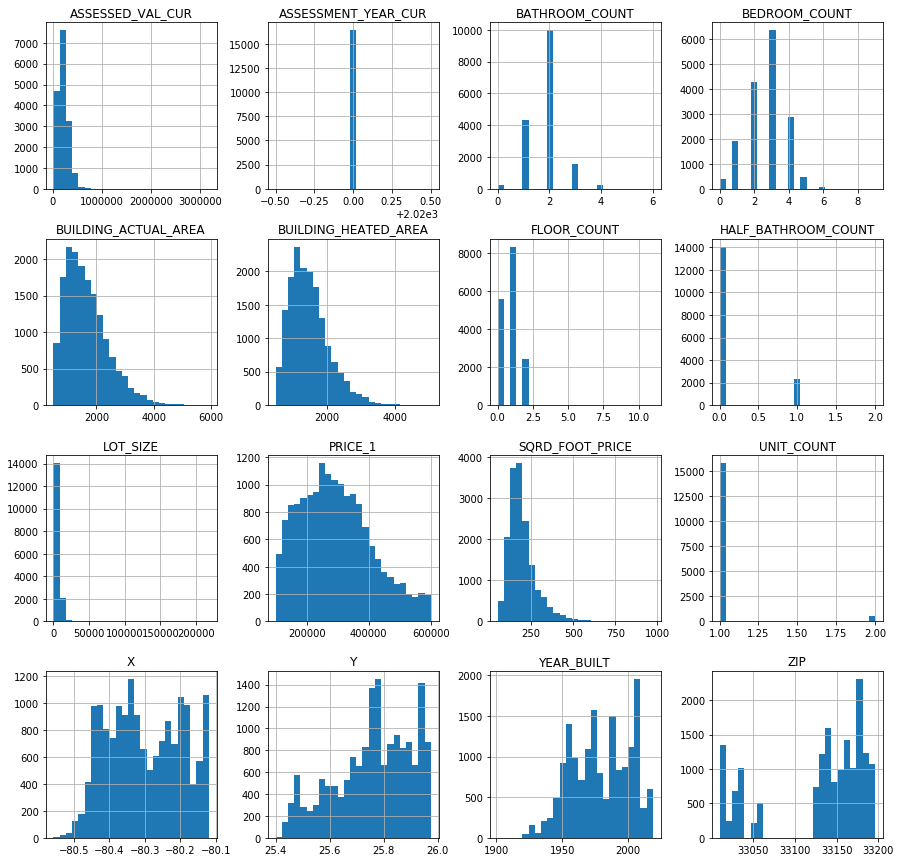

In [19]:
# Plot distribution of numeric attributes

axes = sold_on_year.hist(bins=25, layout=(4,4), figsize=(15,15))

In [20]:
# transform into spatially enabled dataframe 

# uses capabitlies that argis adds to Pandas dataframe
sold_on_year_sdf = pd.DataFrame.spatial.from_xy(sold_on_year, 'X', 'Y')
type(sold_on_year_sdf)

/usr/local/lib/python3.6/dist-packages/arcgis/features/geo/_io/fileops.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SHAPE'] = geoms
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/arcgis/features/geo/_accessor.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

pandas.core.frame.DataFrame

# Analysis By Zip Code

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count     78.000000
mean     210.243590
std      130.308743
min        2.000000
25%      125.250000
50%      205.000000
75%      266.250000
max      666.000000
Name: ZIP, dtype: float64

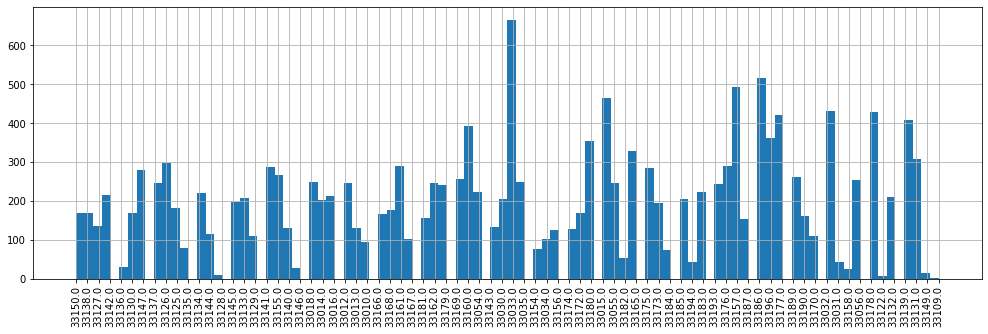

In [21]:
# Sales distribution by zips. 

sold_on_year['ZIP'] = sold_on_year['ZIP'].apply(lambda x: str(x))
sold_on_year['ZIP'].hist(bins=100, xrot=90, figsize=(17,5))
sold_on_year['ZIP'].value_counts().describe()

## Best v.s Worst Selling Zip Codes

In [22]:
# best selling zips

best_selling_zips  = sold_on_year['ZIP'].value_counts()[:10]
worst_selling_zips = sold_on_year['ZIP'].value_counts()[-10:]

print(best_selling_zips)
print(worst_selling_zips)

33033.0    666
33186.0    516
33157.0    494
33015.0    466
33032.0    431
33178.0    429
33177.0    421
33139.0    408
33160.0    392
33196.0    362
Name: ZIP, dtype: int64
33182.0    54
33194.0    42
33031.0    42
33136.0    30
33146.0    27
33158.0    25
33149.0    15
33128.0     9
33122.0     7
33109.0     2
Name: ZIP, dtype: int64


In [23]:
best_selling_zips_sdf = sold_on_year_sdf[sold_on_year_sdf['ZIP'].isin(best_selling_zips.index)]
best_selling_zips_sdf.reset_index(inplace=True)

worst_selling_zips_sdf = sold_on_year_sdf[sold_on_year_sdf['ZIP'].isin(worst_selling_zips.index)]
worst_selling_zips_sdf.reset_index(inplace=True)

# map best selling zips

best_selling_zips_map = gis.map('Miami, Fl')
best_selling_zips_map.basemap = 'gray'
best_selling_zips_map

MapView(layout=Layout(height='400px', width='100%'))

In [24]:
best_selling_zips_sdf.spatial.plot(map_widget=best_selling_zips_map, 
                                   cmap='Greens_r',
                                   alpha=0.7,
                                   outline_color=[0,0,0,0])
worst_selling_zips_sdf.spatial.plot(map_widget=best_selling_zips_map, 
                                    cmap='OrRd_r',
                                    alpha=0.7,
                                    outline_color=[0,0,0,0])

/usr/local/lib/python3.6/dist-packages/arcgis/features/geo/_accessor.py:2335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data['OBJECTID'] = list(range(1, self._data.shape[0] + 1))


True

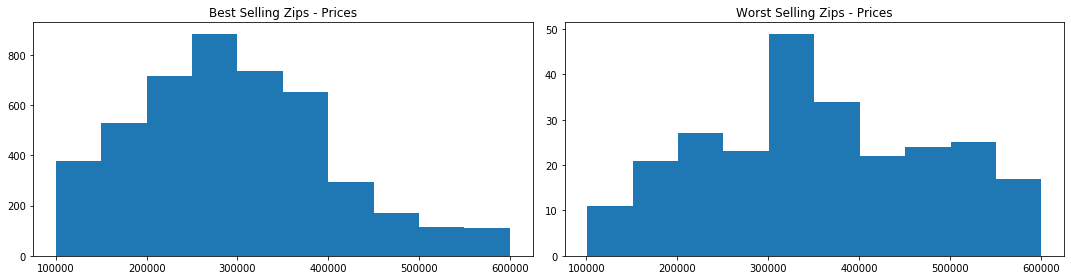

In [25]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 4))

ax0.hist(best_selling_zips_sdf['PRICE_1'])
ax0.set_title('Best Selling Zips - Prices')

ax1.hist(worst_selling_zips_sdf['PRICE_1'])
ax1.set_title('Worst Selling Zips - Prices')


fig.tight_layout()
plt.show()

In [ ]:
worst_selling_zips_sdf.describe()

In [ ]:
best_selling_zips_sdf.describe()

## Visualization of a segment of the data


In [28]:
shortlist_df = sold_on_year[(sold_on_year['BEDROOM_COUNT'] >= 2) &
                         (sold_on_year['BATHROOM_COUNT'] >= 1) &
                         (sold_on_year['YEAR_BUILT'] >= 2006) &
                         (sold_on_year['PRICE_1'] <= 600000) &
                         (sold_on_year['BUILDING_ACTUAL_AREA'] <= 2000)]
shortlist_df.shape

(1075, 20)

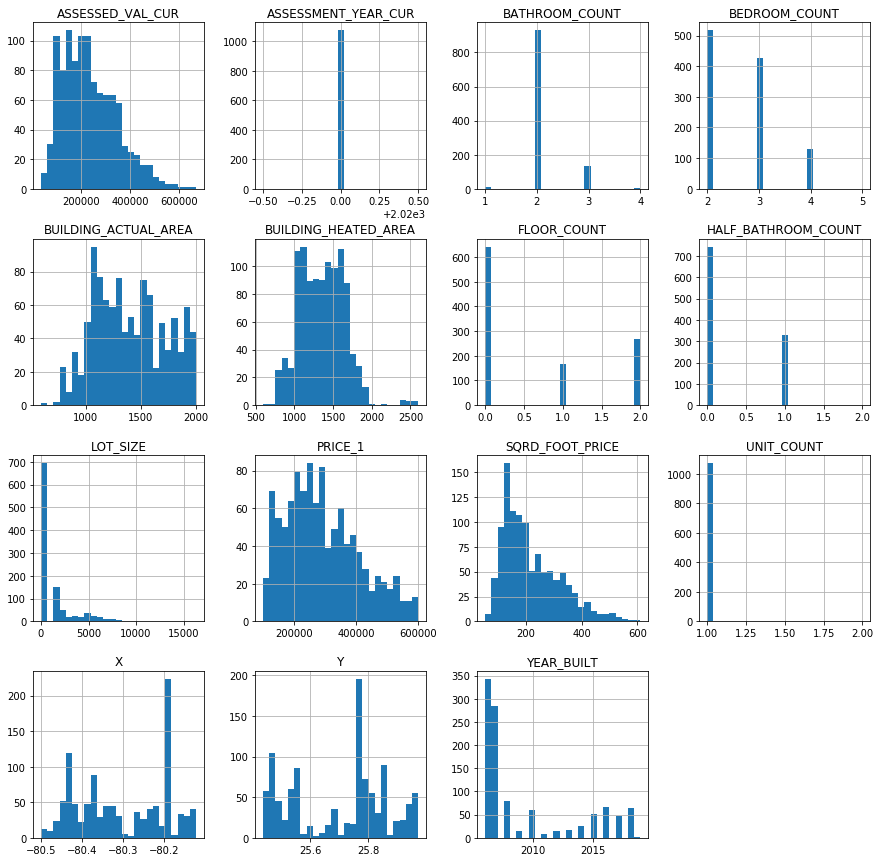

In [29]:
axes2 = shortlist_df.hist(bins=25, layout=(4,4), figsize=(15,15))

In [30]:
shortlist_map = gis.map('Miami, FL')
shortlist_map.basemap = 'gray'
shortlist_map

MapView(layout=Layout(height='400px', width='100%'))

In [31]:
shortlist_df.spatial.plot(map_widget=shortlist_map,
                          alpha=0.5,
                          cmap='Blues',
                          outline_color=[0,0,0,0])

True